#Data Analyst Interview Notebook

## Introduction

This notebook is designed to simulate real-world data that you could see from our technology.

It is designed to test your proficiency with Python and Pandas, and your ability to find and present insights.

This data is confidential; we expect you to not share this data with anyone. And we expect you to not get any external assistance.



---


You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

Each section has defined questions along with point values to help you prioritize your time.  

In addition to the defined questions, the overall notebook and code presentation will be evaluated, and you will be awarded up to 10 points based on the clarity, cleaniness, and efficiency of the code.


## Part 0: Imports

Import necessary packages and

In [2]:
# YOUR CODE HERE:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/My Drive/tote_shipment.xlsx")

Mounted at /content/drive


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [ ]:
# YOUR CODE HERE:
#OPERADORES
zonas=list(set(df['Zone']))
totales=[]
for i in zonas:
  totales.append(list(df['Zone']).count(i))

#CREACION DEL DF
res1 = pd.DataFrame()
res1['Zonas'] = zonas
res1['cantidad']=totales
res1= res1.sort_values('cantidad',ascending=False)

#RESPUESTA
print("Se tiene un total de registros ",df.shape[0])
print("de los cuales existen ", len(zonas),"Zonas distintas")
print("Cada una con los siguientes registros")
res1

Se tiene un total de registros  130061
de los cuales existen  15 Zonas distintas
Cada una con los siguientes registros


,Zonas,cantidad
3,receiving_Store,66099
5,store_back_Store,27041
4,PhoneKit1Bridge,14676
10,PhoneKit2Bridge,14604
0,store_front_Store,3679
7,dock_doors_DC2,1554
9,PhoneKit2GW,869
8,staging_DC1,592
2,pallet_assembly_DC1,455
6,dock_doors_DC1,122


### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [ ]:
# YOUR CODE HERE:
res1=pd.DataFrame( df.loc[df['Temperature_C'] == max(df['Temperature_C']),('Zone', 'Temperature_C')])
res2=pd.DataFrame( df.loc[df['Temperature_C'] == min(df['Temperature_C']),('Zone', 'Temperature_C')])
print("Las temperaturas en grados C varian desde")
print(min(df['Temperature_C']), "hasta los", max(df['Temperature_C']))
print("De igual forma, las temperaturas en grados F varian desde")
print(min(df['Temperature_F']), "hasta los", max(df['Temperature_F']))
print("Brindando un rango de ",max(df['Temperature_C'])-min(df['Temperature_C']),"y ",max(df['Temperature_F'])-min(df['Temperature_F']),"Respectivamente" )
print("Adicionalmente, el maximo en grados C se alcanzo en\n ",res1.drop_duplicates(['Zone']) )
print("\n y el minimo en grados C se alcanzo en\n ",res2.drop_duplicates(['Zone']) )

Las temperaturas en grados C varian desde
19.0 hasta los 44.0
De igual forma, las temperaturas en grados F varian desde
66.2 hasta los 111.2
Brindando un rango de  25.0 y  45.0 Respectivamente
Adicionalmente, el maximo en grados C se alcanzo en
                     Zone  Temperature_C
57195   receiving_Store           44.0
59985  store_back_Store           44.0

 y el minimo en grados C se alcanzo en
                     Zone  Temperature_C
92279  store_back_Store           19.0


## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

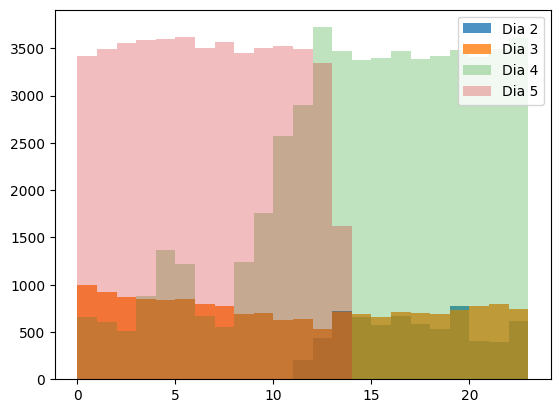

In [ ]:
# YOUR CODE HERE:
fig1,ax=plt.subplots()
res2 = pd.DataFrame()
res2['dias'] = [d.date().day for d in df['time_est']]
res2['horas']= [d.time().hour +d.time().minute/60  for d in df['time_est']]
res2= res2.sort_values('dias')

caso2= res2[res2['dias']==2]
caso3= res2[res2['dias']==3]
caso4= res2[res2['dias']==4]
caso5= res2[res2['dias']==5]


plt.hist(caso2['horas'],np.arange(0, 24),alpha=0.8,label="Dia 2")
plt.hist(caso3['horas'],np.arange(0, 24),alpha=0.8,label="Dia 3")
plt.hist(caso4['horas'],np.arange(0, 24),alpha=0.3,label="Dia 4")
plt.hist(caso5['horas'],np.arange(0, 24),alpha=0.3,label="Dia 5")

plt.legend(loc='upper right')
plt.show()

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



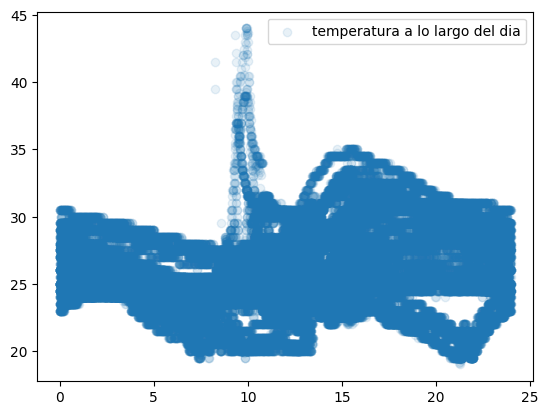

In [ ]:
# YOUR CODE HERE:

fig1,ax=plt.subplots()
res2 = pd.DataFrame()
res2['temp'] = df['Temperature_C']
res2['horas']= [d.time().hour +d.time().minute/60  for d in df['time_est']]
res2= res2.sort_values('horas')

plt.scatter(res2['horas'],res2['temp'],alpha=0.1,label="temperatura a lo largo del dia")

plt.legend(loc='upper right')
plt.show()


### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
# YOUR CODE HERE:

import plotly.express as px
res2 = pd.DataFrame()
res2['lat'] = df['lat']
res2['zona']=df['Zone']
res2['lon']=df['lng']


fig = px.scatter_mapbox(res2, lat="lat", lon="lon", hover_name="zona",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE
import statistics

#OPERADORES
zonas=list(set(df['Zone']))
promedios=[]
res2=pd.DataFrame()
res2['zonas'] =df['Zone']
res2['horas']= [d.time().hour +d.time().minute/60  for d in df['time_est']]

for i in zonas:
  auxiliar =  res2.loc[res2['zonas'] == i,'horas']
  promedios.append( statistics.mean(auxiliar)  )

#CREACION DEL DF
res1 = pd.DataFrame()
res1['Zonas'] = zonas
res1['cantidad']=promedios
res1= res1.sort_values('cantidad',ascending=False)
print("La zona con horario mayor es PhoneKit2GW ")
print("y la que tiene mas eficacia es standing_DC2 tal como se muestra en la tabla \n",res1)


La zona con horario mayor es PhoneKit2GW 
y la que tiene mas eficacia es standing_DC2 tal como se muestra en la tabla 
                   Zonas   cantidad
9           PhoneKit2GW  14.547909
6        dock_doors_DC1  13.645902
1         Forklift3_DC1  13.212222
8           staging_DC1  12.949240
12        Forklift1_DC1  12.941398
2   pallet_assembly_DC1  12.548864
5      store_back_Store  12.042953
3       receiving_Store  11.835574
11          PhoneKit1GW  11.757116
4       PhoneKit1Bridge  11.670519
10      PhoneKit2Bridge  11.546269
0     store_front_Store  11.377267
14  point_of_sale_Store  10.968162
7        dock_doors_DC2  10.529794
13          staging_DC2   6.928351


YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [6]:
# YOUR CODE HERE

import statistics

#OPERADORES
zonas=list(set(df['Zone']))
rangos=[]
res2=pd.DataFrame()
res2['zonas'] =df['Zone']
res2['horas']= [d.time().hour +d.time().minute/60  for d in df['time_est']]

for i in zonas:
  auxiliar =  res2.loc[res2['zonas'] == i,'horas']
  rangos.append( max(auxiliar)-min(auxiliar)  )

#CREACION DEL DF
res1 = pd.DataFrame()
res1['Zonas'] = zonas
res1['cantidad']=rangos
res1= res1.sort_values('cantidad',ascending=False)
print("La zona con horario mayor es dock_doors_DC2 ")
print("y la que tiene mas eficacia es Forklift3_DC1 tal como se muestra en la tabla \n",res1)
print("\n Un KPI que se podria recomendar es aquellos que no superen una barrera establecida, por ejemplo\n")
print(res1[res1['cantidad']<5])


La zona con horario mayor es dock_doors_DC2 
y la que tiene mas eficacia es Forklift3_DC1 tal como se muestra en la tabla 
                   Zonas   cantidad
2        dock_doors_DC2  23.983333
4      store_back_Store  23.983333
7       PhoneKit1Bridge  23.983333
8       PhoneKit2Bridge  23.983333
12      receiving_Store  23.983333
11          PhoneKit2GW  23.933333
6           PhoneKit1GW  23.733333
10    store_front_Store  23.716667
5           staging_DC2  22.866667
1   point_of_sale_Store   4.333333
13          staging_DC1   3.683333
9        dock_doors_DC1   3.633333
3   pallet_assembly_DC1   3.600000
0         Forklift1_DC1   3.483333
14        Forklift3_DC1   2.550000

 Un KPI que se podria recomendar es aquellos que no superen una barrera establecida, por ejemplo

                  Zonas  cantidad
1   point_of_sale_Store  4.333333
13          staging_DC1  3.683333
9        dock_doors_DC1  3.633333
3   pallet_assembly_DC1  3.600000
0         Forklift1_DC1  3.483333
14        For

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. Los recorridos realizados en el tiempo registrado
* b. Analisis de las rutas
* c. La tempratura maxima por que es alcanzada
* d. Identificar que proceso es mas efectivo y que elementos estan involucrados

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [7]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

#OPERADORES
zonas=list(set(df['Zone']))
rangosmax=[]
rangosmin=[]
res2=pd.DataFrame()
res2['zonas'] =df['Zone']
res2['horas']= [d.time().hour +d.time().minute/60  for d in df['time_est']]

for i in zonas:
  auxiliar =  res2.loc[res2['zonas'] == i,'horas']
  rangosmax.append( max(auxiliar)  )
  rangosmin.append( min(auxiliar)  )

#CREACION DEL DF
res1 = pd.DataFrame()
res1['Zonas'] = zonas
res1['mayor']=rangosmax
res1['menor']=rangosmin
res1= res1.sort_values('mayor',ascending=False)
print("La zona con horario mayor es dock_doors_DC2 ")
print("y la que tiene mas eficacia es point_of_sale_Store tal como se muestra en la tabla \n",res1)


La zona con horario mayor es dock_doors_DC2 
y la que tiene mas eficacia es Forklift3_DC1 tal como se muestra en la tabla 
                   Zonas      mayor      menor
2        dock_doors_DC2  23.983333   0.000000
4      store_back_Store  23.983333   0.000000
7       PhoneKit1Bridge  23.983333   0.000000
8       PhoneKit2Bridge  23.983333   0.000000
12      receiving_Store  23.983333   0.000000
11          PhoneKit2GW  23.966667   0.033333
10    store_front_Store  23.833333   0.116667
6           PhoneKit1GW  23.800000   0.066667
5           staging_DC2  23.633333   0.766667
14        Forklift3_DC1  14.216667  11.666667
9        dock_doors_DC1  13.966667  10.333333
13          staging_DC1  13.966667  10.283333
3   pallet_assembly_DC1  13.850000  10.250000
0         Forklift1_DC1  13.716667  10.233333
1   point_of_sale_Store  12.716667   8.383333


YOUR TEXT ANSWER HERE
